In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

In [3]:
bestmodel = load_model("/content/drive/MyDrive/YANG/model/final_model/just_sh/model_0.86_0.40.keras")

In [4]:
IMGS_val = np.load('/content/drive/MyDrive/YANG/npy/0615/imgs_val.npy')
RATIO_val = np.load('/content/drive/MyDrive/YANG/npy/0615/ratios_val.npy')
TARGET_val = np.load('/content/drive/MyDrive/YANG/npy/0615/target_val.npy')

print("IMGS_val shape:", IMGS_val.shape)
print("RATIO_val shape:", RATIO_val.shape)
print("TARGET_val shape:", TARGET_val.shape)

IMGS_val shape: (4551, 224, 224, 3)
RATIO_val shape: (4551,)
TARGET_val shape: (4551, 5)


In [5]:
# 데이터 수
n_samples = IMGS_val.shape[0]

# 데이터 인덱스 배열 만들기
indices = np.arange(n_samples)

# 인덱스 배열 섞기
np.random.shuffle(indices)

# 섞인 인덱스로 데이터 섞기
IMGS_shuffled = IMGS_val[indices]
RATIO_shuffled = RATIO_val[indices]
TARGET_shuffled = TARGET_val[indices]

print("IMGS_shuffled shape:", IMGS_shuffled.shape)
print("RATIO_shuffled shape:", RATIO_shuffled.shape)
print("TARGET_shuffled shape:", TARGET_shuffled.shape)

IMGS_shuffled shape: (4551, 224, 224, 3)
RATIO_shuffled shape: (4551,)
TARGET_shuffled shape: (4551, 5)


In [7]:
import gc
del IMGS_val
del RATIO_val
del TARGET_val
gc.collect()

14

In [7]:
test_score = bestmodel.evaluate([IMGS_shuffled, RATIO_shuffled], TARGET_shuffled)

143/143 [==============================] - 29s 205ms/step - loss: 0.3797 - accuracy: 0.8646
test_loss: 0.38
test_accuracy: 0.86


In [9]:
print(f"test_loss: {test_score[0]:.4f}")
print(f"test_accuracy: {test_score[1]:.4f}")

test_loss: 0.3797
test_accuracy: 0.8646


143/143 [==============================] - 29s 202ms/step


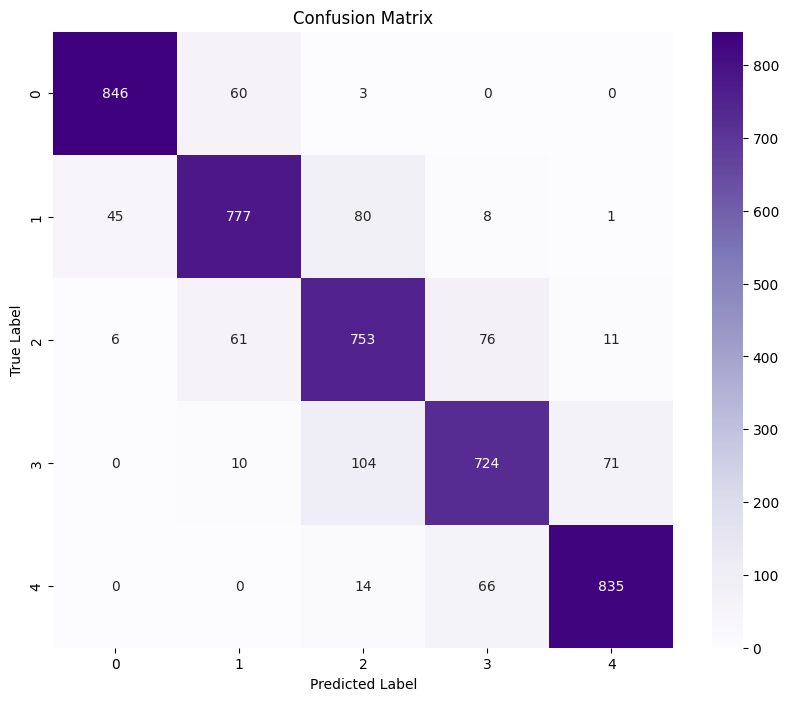

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 예시 데이터 (테스트 데이터)
# X_test: 테스트 이미지 데이터
# y_test: 테스트 라벨 (원핫 인코딩된 형태)
# additional_input_test: 추가 입력 데이터

num_classes = 5

# 모델 예측
y_pred_prob = bestmodel.predict([IMGS_shuffled, RATIO_shuffled])

# 원핫 인코딩된 예측값을 정수형 라벨로 변환
y_pred = np.argmax(y_pred_prob, axis=1)

# 원핫 인코딩된 실제 라벨을 정수형 라벨로 변환
y_true = np.argmax(TARGET_shuffled, axis=1)

# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(classification_report(y_true, y_pred, target_names=[f"Class {i}" for i in range(num_classes)]))

              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.94       909
     Class 1       0.86      0.85      0.85       911
     Class 2       0.79      0.83      0.81       907
     Class 3       0.83      0.80      0.81       909
     Class 4       0.91      0.91      0.91       915

    accuracy                           0.86      4551
   macro avg       0.87      0.86      0.86      4551
weighted avg       0.87      0.86      0.86      4551

